In [ ]:
pip install matplotlib

SyntaxError: invalid syntax (3683400269.py, line 1)

In [6]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 3.5 MB/s  0:01:01m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 3.4 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 2.6 MB/s  0:00:0036m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.2 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.9 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29/29 [tensorflow]9 [tensorflow]]py]ns]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


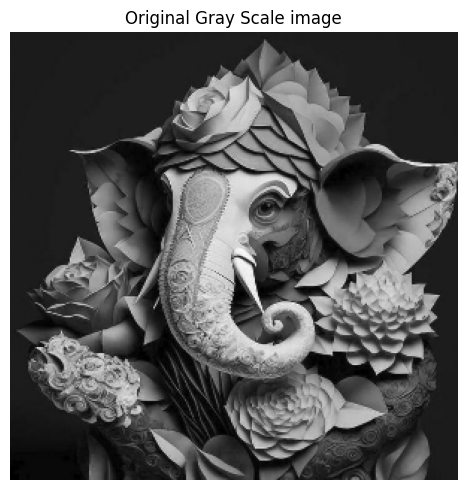

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from itertools import product

# at runtime (rc), make sure plot is not cut off by the figure size
plt.rc('figure', autolayout = True)
plt.rc('image', cmap = 'magma') # setting up colormap

# define our filter/kernel
kernel = tf.constant([[-1,-1,-1], [-1,8,-1], [-1,-1,-1],]) # this is our feature decector

# load our image
image = tf.io.read_file('Ganesh.jpg')
image = tf.image.decode_image(image, channels = 1) # Takes encoded image bytes (PNG, JPEG, GIF, BMP) and converts them into a TensorFlow tensor of pixel values
# channels = 1 means we want to convert the image to grayscale
image = tf.image.resize(image, [300, 300]) # resizing the image to 300x300 pixels

# plot image
img = tf.squeeze(image).numpy() # need to remove 3rd dimension since greyscale expects 2D array
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

